In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from pandas import DataFrame,Series


In [3]:
#import dataset

In [4]:
train_data=p.read_csv("train_sentiment.csv")

In [5]:
# data description

In [6]:
train_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id       7920 non-null int64
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


In [10]:
b=train_data["tweet"][2]
b


'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu'

In [11]:
# removing punctuations and conerting into a list of letters

In [12]:
import string
b=[word for word in b if word not in string.punctuation]
b

['W',
 'e',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'W',
 'o',
 'u',
 'l',
 'd',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'g',
 'o',
 ' ',
 't',
 'a',
 'l',
 'k',
 ' ',
 'm',
 'a',
 'k',
 'e',
 'm',
 'e',
 'm',
 'o',
 'r',
 'i',
 'e',
 's',
 ' ',
 'u',
 'n',
 'p',
 'l',
 'u',
 'g',
 ' ',
 'r',
 'e',
 'l',
 'a',
 'x',
 ' ',
 'i',
 'p',
 'h',
 'o',
 'n',
 'e',
 ' ',
 's',
 'm',
 'a',
 'r',
 't',
 'p',
 'h',
 'o',
 'n',
 'e',
 ' ',
 'w',
 'i',
 'f',
 'i',
 ' ',
 'c',
 'o',
 'n',
 'n',
 'e',
 'c',
 't',
 ' ',
 'h',
 't',
 't',
 'p',
 'f',
 'b',
 'm',
 'e',
 '6',
 'N',
 '3',
 'L',
 's',
 'U',
 'p',
 'C',
 'u']

In [13]:
#joining the letters and forming words

In [14]:
b=''.join(b)
b

'We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme6N3LsUpCu'

In [15]:
# function to do same i.e. removing punctuations and returning words

In [16]:
def improveData(n):
    
    n= [words for words in n if words not in string.punctuation]
    n=[''.join(n)]
    return n

In [17]:
# adding a column to train_data to calculate length of each tweet
train_data["length"]=train_data.tweet.apply(len)
train_data["tweet"]=train_data.tweet.apply(improveData)
train_data.head()

,id,label,tweet,length
0,1,0,[fingerprint Pregnancy Test httpsgooglh1MfQV a...,128
1,2,0,[Finally a transparant silicon case Thanks to...,131
2,3,0,[We love this Would you go talk makememories u...,123
3,4,0,[Im wired I know Im George I was made that way...,112
4,5,1,[What amazing service Apple wont even talk to ...,124


In [18]:


word=[' '.join(item) for item in train_data.tweet]

In [19]:
train_data["tweet"].head()

0    [fingerprint Pregnancy Test httpsgooglh1MfQV a...
1    [Finally a transparant silicon case  Thanks to...
2    [We love this Would you go talk makememories u...
3    [Im wired I know Im George I was made that way...
4    [What amazing service Apple wont even talk to ...
Name: tweet, dtype: object

In [20]:
# visualizing the data, ploting the histogram on length

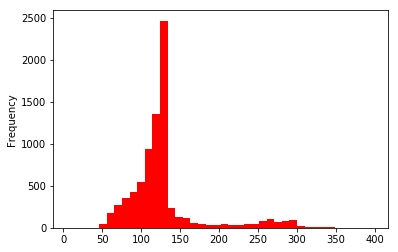

In [21]:
train_data["length"].plot(bins=40,kind="hist",color="r")

C:\Users\GOVIND SINGH\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\GOVIND SINGH\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


Text(0.5, 1.0, ' 1 :- informative')

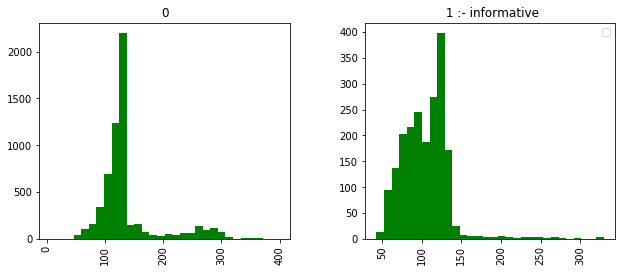

In [37]:
train_data.hist(column="length",by="label",bins=30,figsize=(10,4),color="green")
plt.legend((0,1),("non-informative","informative"))
plt.title(" 0 :- non-infomative")
plt.title(" 1 :- informative")

In [38]:
# Above the cell we can see that the informative data have a quite uniform lengths lesser random than non informative data

In [28]:
# Below here we can see , the avg length of informative tweets are 104.27 and avg length for non-informative is 137.11

In [27]:
train_data.groupby("label").mean()

,id,length
label,,
0,3954.497285,137.201391
1,3977.962981,104.830701


In [39]:
# Now vectorizing the data 

In [40]:
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import  CountVectorizer


In [41]:
countVector=CountVectorizer()
bag_of_words=countVector.fit(word).transform(word)

In [42]:
bag_of_words

<7920x22631 sparse matrix of type '<class 'numpy.int64'>'
	with 118278 stored elements in Compressed Sparse Row format>

In [43]:
print (bag_of_words)

  (0, 1194)	1
  (0, 1470)	1
  (0, 2062)	1
  (0, 4057)	1
  (0, 5671)	1
  (0, 7173)	1
  (0, 10308)	1
  (0, 11785)	1
  (0, 12405)	1
  (0, 12485)	1
  (0, 12502)	1
  (0, 17196)	1
  (0, 20403)	1
  (1, 3086)	1
  (1, 5652)	1
  (1, 9152)	1
  (1, 14948)	1
  (1, 18995)	1
  (1, 19357)	1
  (1, 19383)	1
  (1, 20445)	1
  (1, 20730)	1
  (1, 20886)	1
  (1, 21220)	1
  (1, 22279)	1
  :	:
  (7918, 1315)	1
  (7918, 3708)	1
  (7918, 5652)	1
  (7918, 6198)	1
  (7918, 6696)	1
  (7918, 9861)	1
  (7918, 12382)	1
  (7918, 14948)	1
  (7918, 17030)	1
  (7918, 18292)	1
  (7918, 18377)	1
  (7918, 19180)	1
  (7918, 19677)	1
  (7918, 21989)	1
  (7919, 1356)	2
  (7919, 1941)	2
  (7919, 2011)	1
  (7919, 2893)	1
  (7919, 5797)	1
  (7919, 6137)	1
  (7919, 9009)	1
  (7919, 12405)	1
  (7919, 18675)	1
  (7919, 19757)	1
  (7919, 20894)	1


In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_object=TfidfTransformer()
tfidf_rf=tfidf_object.fit(bag_of_words).transform(bag_of_words)

In [47]:
#creating train test data

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(tfidf_rf,train_data.label)

In [55]:
# initializing Random forest

In [56]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=200)

In [58]:
rf_model.fit(X_train,Y_train)
y_pred_rf=rf_model.predict(X_test)
accuracy_rf=metrics.accuracy_score(Y_test,y_pred_rf)

In [59]:
print (accuracy_rf)

0.8585858585858586


In [64]:
# initializing the svm model

In [65]:
from sklearn.svm import SVC

In [67]:
svm_model1=SVC(kernel="linear",C=1.0).fit(X_train,Y_train)
y_pred_m1=svm_model1.predict(X_test)
accuracy_m1=metrics.accuracy_score(Y_test,y_pred_m1)

In [69]:
svm_model2=SVC(kernel="poly", degree=3, C=1.0).fit(X_train,Y_train)
y_pred_m2=svm_model2.predict(X_test)
accuracy_m2=metrics.accuracy_score(Y_test,y_pred_m2)

In [71]:
svm_model3=SVC(kernel="rbf",gamma=0.7,C=1.0).fit(X_train,Y_train)
y_pred_m3=svm_model3.predict(X_test)
accuracy_m3=metrics.accuracy_score(Y_test,y_pred_m3)

In [73]:
accuracy=[accuracy_rf,accuracy_m1,accuracy_m2,accuracy_m3]

In [74]:
accuracy

[0.8585858585858586, 0.8803030303030303, 0.748989898989899, 0.8737373737373737]

In [76]:
# accuracy with poly with degree=3 is worst maybe overfitting problem

In [77]:
accuracy_name=["randomForest","SVM_linear","SVM_poly","SVM_rbf"]

Text(0.5, 1.0, 'Accuracy From Different Models')

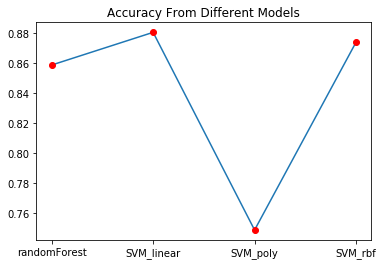

In [83]:
plt.plot(accuracy_name,accuracy)
plt.plot(accuracy_name,accuracy,'o',color='red')
plt.title("Accuracy From Different Models")

In [80]:
# from this conclusion we conclude that svm linear is fitting best for this data, so we will use svm_linear model